In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from skimage import feature
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

In [14]:
Categories=['neg','pos']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='C:\\Users\\HP\\Desktop\\INRIA_Dataset_Samples\\Train'
#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        # get the HOG descriptor for the image
        #hog_desc = feature.hog(img_resized, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys')
        #hog_desc = feature.hog(img_resized, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), transform_sqrt=True, block_norm='L2-Hys')
        hog_desc = feature.hog(img_resized, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), transform_sqrt=False)
        flat_data_arr.append(hog_desc)
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

loading... category : neg
loaded category:neg successfully
loading... category : pos
loaded category:pos successfully


In [15]:
Categories=['neg','pos']
test_flat_data_arr=[] #input array
test_target_arr=[] #output array
test_datadir='C:\\Users\\HP\\Desktop\\INRIA_Dataset_Samples\\Test'
#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    test_path=os.path.join(test_datadir,i)
    for img in os.listdir(test_path):
        test_img_array=imread(os.path.join(test_path,img))
        test_img_resized=resize(test_img_array,(150,150,3))
        # get the HOG descriptor for the image
        #test_hog_desc = feature.hog(test_img_resized, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys')
        #test_hog_desc = feature.hog(test_img_resized, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), transform_sqrt=True, block_norm='L2-Hys')
        test_hog_desc = feature.hog(test_img_resized, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), transform_sqrt=False)
        test_flat_data_arr.append(hog_desc)
        test_target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
test_flat_data=np.array(test_flat_data_arr)
test_target=np.array(test_target_arr)
test_df=pd.DataFrame(test_flat_data) #dataframe
test_df['Target']=test_target
test_x=df.iloc[:,:-1] #input data 
test_y=df.iloc[:,-1] #output data

loading... category : neg
loaded category:neg successfully
loading... category : pos
loaded category:pos successfully


Parameters of HOG: 
orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys'
AND
support = svm.LinearSVC(random_state=20)

D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Your Model Accuracy is 1.0
F1-score is 1.0


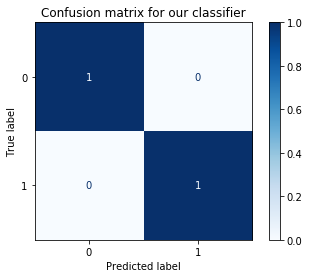

In [4]:
#with parameters:: hog_desc = feature.hog(img_resized, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys')

# Create Linear SVM object
support = svm.LinearSVC(random_state=20)

# Train the model using the training sets and check score on test dataset
support.fit(x, y)
predicted= support.predict(test_x)
score=accuracy_score(test_y,predicted)
print("Your Model Accuracy is", score)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
matrix = plot_confusion_matrix(support, test_x, test_y,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
f1=f1_score(test_y, predicted, average='weighted')
print("F1-score is", f1)
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

Parameters of HOG: 
orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys'
AND
clf = svm.SVC(kernel='linear', C=0.01).fit(x, y)

Your Model Accuracy is 0.9991744634012107
F1-score is 0.9991742105517646


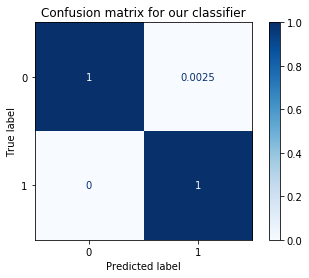

In [5]:
#with parameters:: hog_desc = feature.hog(img_resized, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys')
clf = svm.SVC(kernel='linear', C=0.01).fit(x, y)

predicted= clf.predict(test_x)
score=accuracy_score(test_y,predicted)
print("Your Model Accuracy is", score)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
matrix = plot_confusion_matrix(clf, test_x, test_y,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
f1=f1_score(test_y, predicted, average='weighted')
print("F1-score is", f1)
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

Parameters of HOG: 
orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys'
AND
clf=RandomForestClassifier(n_estimators=100)

Your Model Accuracy is 0.9991744634012107
F1-score is 0.9991742105517646


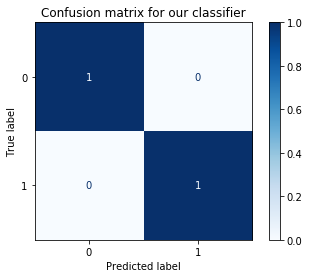

In [7]:
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x,y)
# prediction on test set
y_pred=clf.predict(test_x)
score=accuracy_score(test_y,predicted)
print("Your Model Accuracy is", score)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
matrix = plot_confusion_matrix(clf, test_x, test_y,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
f1=f1_score(test_y, predicted, average='weighted')
print("F1-score is", f1)
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

Parameters of HOG: 
orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), transform_sqrt=True, block_norm='L2-Hys'
AND
support = svm.LinearSVC(random_state=20)

Your Model Accuracy is 0.999724821133737
F1-score is 0.9997248491117365


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


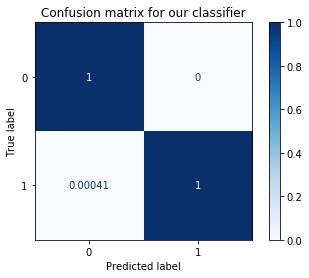

In [10]:
#with parameters::hog_desc = feature.hog(img_resized, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), transform_sqrt=True, block_norm='L2-Hys')

# Create Linear SVM object
support = svm.LinearSVC(random_state=20)

# Train the model using the training sets and check score on test dataset
support.fit(x, y)

predicted= support.predict(test_x)
score=accuracy_score(test_y,predicted)
print("Your Model Accuracy is", score)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
matrix = plot_confusion_matrix(support, test_x, test_y,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
f1=f1_score(test_y, predicted, average='weighted')
print("F1-score is", f1)
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

Parameters of HOG: 
orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), transform_sqrt=False
AND
support = svm.LinearSVC(random_state=20)

Your Model Accuracy is 0.999724821133737
F1-score is 0.9997248491117365


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


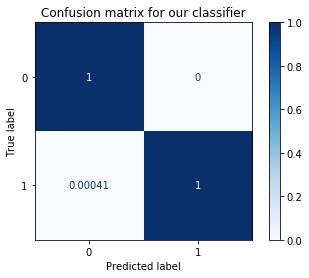

In [16]:
#with parameters::hog_desc = feature.hog(img_resized, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), transform_sqrt=False)

# Create Linear SVM object
support = svm.LinearSVC(random_state=20)

# Train the model using the training sets and check score on test dataset
support.fit(x, y)

predicted= support.predict(test_x)
score=accuracy_score(test_y,predicted)
print("Your Model Accuracy is", score)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
matrix = plot_confusion_matrix(support, test_x, test_y,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
f1=f1_score(test_y, predicted, average='weighted')
print("F1-score is", f1)
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

Parameters of HOG: 
orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), transform_sqrt=False
AND
clf = svm.SVC(kernel='linear', C=0.01).fit(x, y)

Your Model Accuracy is 0.949642267473858
F1-score is 0.949274512127792


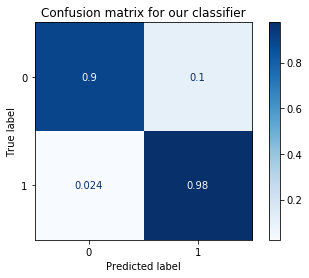

In [17]:
#with parameters::hog_desc = feature.hog(img_resized, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), transform_sqrt=False)

clf = svm.SVC(kernel='linear', C=0.01).fit(x, y)

predicted= clf.predict(test_x)
score=accuracy_score(test_y,predicted)
print("Your Model Accuracy is", score)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
matrix = plot_confusion_matrix(clf, test_x, test_y,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
f1=f1_score(test_y, predicted, average='weighted')
print("F1-score is", f1)
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()